In [1]:
# Pandas
import pandas as pd

#config file
from config import username_pass as up

# SQL Alchemy
from sqlalchemy import create_engine

In [2]:
path = 'postgresql+pg8000://'+up+'@localhost:5432/Employees'
engine = create_engine(path)
conn = engine.connect()

In [3]:
data = pd.read_sql("SELECT * FROM Employees", conn)

In [4]:
data

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [5]:
salary = pd.read_sql("SELECT * FROM Salaries", conn)

In [6]:
salary

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12
...,...,...,...,...
300019,499995,40000,1997-06-02,1998-06-02
300020,499996,58058,1996-05-13,1997-05-13
300021,499997,49597,1987-08-30,1988-08-29
300022,499998,40000,1993-12-27,1994-12-27


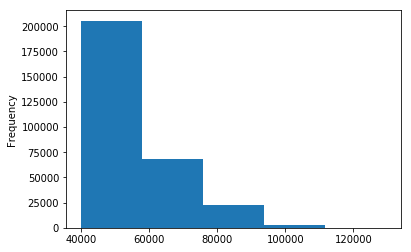

In [20]:
salary['salary'].plot(kind='hist', bins=5)

In [8]:
title = pd.read_sql("SELECT * FROM Titles", conn)

In [9]:
title

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [10]:
salary_by_title = pd.merge(salary, title, on='emp_no', how='inner')
salary_by_title = salary_by_title[['emp_no', 'salary', 'title']]
salary_by_title

,emp_no,salary,title
0,10001,60117,Senior Engineer
1,10002,65828,Staff
2,10003,40006,Senior Engineer
3,10004,40054,Engineer
4,10004,40054,Senior Engineer
...,...,...,...
443303,499997,49597,Engineer
443304,499997,49597,Senior Engineer
443305,499998,40000,Senior Staff
443306,499998,40000,Staff


In [11]:
salary_by_title['title'].value_counts()

Engineer              115003
Staff                 107391
Senior Engineer        97750
Senior Staff           92853
Technique Leader       15159
Assistant Engineer     15128
Manager                   24
Name: title, dtype: int64

In [12]:
salary_group = salary_by_title.groupby(by='title')
salary_group['salary'].mean()

title
Assistant Engineer    48493.204786
Engineer              48539.781423
Manager               51531.041667
Senior Engineer       48506.751806
Senior Staff          58503.286614
Staff                 58465.271904
Technique Leader      48580.505772
Name: salary, dtype: float64

In [13]:
salary_mean = pd.DataFrame(salary_group['salary'].mean())

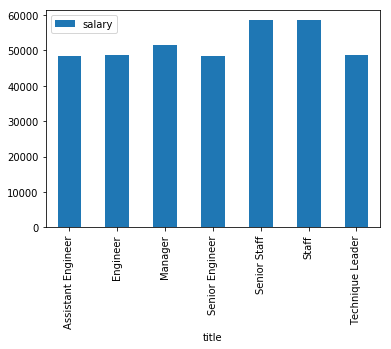

In [22]:
salary_mean.plot(kind='bar')